In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import datetime
import time
import requests
import json
import dateutil.parser
import unicodedata
from dotenv import load_dotenv
from pytwitter import Api

In [2]:
# Load  ENV
load_dotenv()

# Set Alpaca API key and secret
# YOUR CODE HERE

twitter_api_key = os.getenv('twitter_api_key')
twitter_api_secret_key = os.getenv('twitter_api_secret_key')
bearer_token = Api(os.getenv('bearer_token'))

In [3]:
print(type(twitter_api_key))
print(type(twitter_api_secret_key))
print(type(bearer_token))

<class 'str'>
<class 'str'>
<class 'pytwitter.api.Api'>


In [4]:
from datetime import datetime

def convert_id_to_date(idd):
    shifted = int(idd) >> 22
    timestamp=shifted+1288834974657
    time_created = datetime.fromtimestamp(timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')
    return time_created

In [5]:
tweet_response_ethereum = bearer_token.search_tweets(query='ethereum', max_results=100)

ethereum_tweet_data = tweet_response_ethereum.data

In [6]:
for tweet in ethereum_tweet_data:
    print(tweet.text)
    print(convert_id_to_date(tweet.id))

RT @AteriumUniverse: If you're seeing this you're early 👀 .  

Any interaction on this tweet will be considered for WL 

#Ethereum #Ethereu…
2022-04-15 13:18:22
Check out this item on OpenSea https://t.co/3tAOV1rOgj lewat @opensea

#NFTs #NFT #NFTCommmunity #Metamask #NFTGiveaways #NFTCommunity #NFTProject #NFTCollection #ETH #Ethereum #OpenSeaNFT #opensea #Polygon #Metaverse #NFTartist
2022-04-15 13:18:19
I believe ea btc $100.000  #btc #bitcoin #binance #eth #ethereum

https://t.co/rel2oM3xhe
2022-04-15 13:18:18
North Korean Lazarus Group allegedly behind Ronin Bridge hack #ethereum #crypto https://t.co/38sh62ZNm6
2022-04-15 13:18:18
Here’s why Chiliz (CHZ) multi-team NFL partnership and Web3 expansion plan could be bullish #ethereum #crypto https://t.co/ME1LCz1uQV
2022-04-15 13:18:18
Exchanges to buy Ethereum

The easiest and perhaps the most popular way of buying Ether is doing so through an exchange.

https://t.co/tRRcDmR94o

 https:// 

#Defi 

https://t.co/v8sJO65VIQ
#blockchain

In [7]:
ethereum_df = pd.DataFrame(ethereum_tweet_data)
ethereum_df['id']=ethereum_df['id'].apply(lambda x: convert_id_to_date(x))
ethereum_df

,id,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,...,non_public_metrics,organic_metrics,possibly_sensitive,promoted_metrics,public_metrics,referenced_tweets,reply_settings,source,withheld,matching_rules
0,2022-04-15 13:18:22,RT @AteriumUniverse: If you're seeing this you...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2022-04-15 13:18:19,Check out this item on OpenSea https://t.co/3t...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2022-04-15 13:18:18,I believe ea btc $100.000 #btc #bitcoin #bina...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2022-04-15 13:18:18,North Korean Lazarus Group allegedly behind Ro...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2022-04-15 13:18:18,Here’s why Chiliz (CHZ) multi-team NFL partner...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-04-15 13:17:15,"RT @hoskytoken: Giveaway: 1,000,000,000 $milkH...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
96,2022-04-15 13:17:14,RT @bull_bnb: That's where I think we are. I w...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,2022-04-15 13:17:14,Yesterday I had only 10 #btc... Today 100.000 ...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
98,2022-04-15 13:17:13,RT @AnimeLtd: MetaMask is a software cryptocur...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [8]:
ethereum_df_text = ethereum_df. drop(labels=['attachments','author_id','context_annotations','conversation_id','created_at','entities','geo','in_reply_to_user_id','non_public_metrics','organic_metrics','possibly_sensitive',
                                   'promoted_metrics', 'public_metrics', 'referenced_tweets', 'reply_settings', 'source', 'withheld', 'matching_rules','lang'],
                                   axis=1)
ethereum_df_text

,id,text
0,2022-04-15 13:18:22,RT @AteriumUniverse: If you're seeing this you...
1,2022-04-15 13:18:19,Check out this item on OpenSea https://t.co/3t...
2,2022-04-15 13:18:18,I believe ea btc $100.000 #btc #bitcoin #bina...
3,2022-04-15 13:18:18,North Korean Lazarus Group allegedly behind Ro...
4,2022-04-15 13:18:18,Here’s why Chiliz (CHZ) multi-team NFL partner...
...,...,...
95,2022-04-15 13:17:15,"RT @hoskytoken: Giveaway: 1,000,000,000 $milkH..."
96,2022-04-15 13:17:14,RT @bull_bnb: That's where I think we are. I w...
97,2022-04-15 13:17:14,Yesterday I had only 10 #btc... Today 100.000 ...
98,2022-04-15 13:17:13,RT @AnimeLtd: MetaMask is a software cryptocur...


In [9]:
""" DATA CLEANING AND ANALYSIS IMPORTS """

# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [10]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# Clean Tweet Data for Sentiment Analysis

# Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
ethereum_df_text['text'] = ethereum_df_text['text'].apply(lambda text: cleaning_stopwords(text))

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
ethereum_df_text['text']= ethereum_df_text['text'].apply(lambda x: cleaning_punctuations(x))

# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
ethereum_df_text['text'] = ethereum_df_text['text'].apply(lambda x: cleaning_repeating_char(x))

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
ethereum_df_text['text'] = ethereum_df_text['text'].apply(lambda x: cleaning_URLs(x))


# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

ethereum_df_text = ethereum_df_text.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
ethereum_df_text.head(20)

,id,text
0,2022-04-15 13:18:22,RT AteriumUniverse If youre seeing youre early...
1,2022-04-15 13:18:19,Check item OpenSea httpstco3tAO1rOgj lewat ope...
2,2022-04-15 13:18:18,I believe ea btc100000 btc bitcoin binance eth...
3,2022-04-15 13:18:18,North Korean Lazarus Group allegedly behind Ro...
4,2022-04-15 13:18:18,Heres Chiliz CHZ multiteam NFL partnership Web...
5,2022-04-15 13:18:16,Exchanges buy Ethereum The easiest perhaps pop...
6,2022-04-15 13:18:16,We know btc moon crypto binance cryptocurrency...
7,2022-04-15 13:18:16,OuterRingMMO 2 now also 2 Crypto bitcoin btc...
8,2022-04-15 13:18:15,RT AteriumUniverse If youre seeing youre early...
9,2022-04-15 13:18:14,StuckInQueue Kindly inbox right ethereum walle...


In [12]:
#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_df_text.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_df_text = ethereum_df_text.join(text_sentiment_df)

In [13]:
ethereum_df_text.head(50)

,id,text,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-04-15 13:18:22,RT AteriumUniverse If youre seeing youre early...,0.0000,0.000,1.000,0.000,0
1,2022-04-15 13:18:19,Check item OpenSea httpstco3tAO1rOgj lewat ope...,0.0000,0.000,1.000,0.000,0
2,2022-04-15 13:18:18,I believe ea btc100000 btc bitcoin binance eth...,0.0000,0.000,1.000,0.000,0
3,2022-04-15 13:18:18,North Korean Lazarus Group allegedly behind Ro...,0.0000,0.000,1.000,0.000,0
4,2022-04-15 13:18:18,Heres Chiliz CHZ multiteam NFL partnership Web...,0.0000,0.000,1.000,0.000,0
5,2022-04-15 13:18:16,Exchanges buy Ethereum The easiest perhaps pop...,0.6808,0.272,0.728,0.000,1
6,2022-04-15 13:18:16,We know btc moon crypto binance cryptocurrency...,0.0000,0.000,1.000,0.000,0
7,2022-04-15 13:18:16,OuterRingMMO 2 now also 2 Crypto bitcoin btc...,0.0000,0.000,1.000,0.000,0
8,2022-04-15 13:18:15,RT AteriumUniverse If youre seeing youre early...,0.0000,0.000,1.000,0.000,0
9,2022-04-15 13:18:14,StuckInQueue Kindly inbox right ethereum walle...,0.7269,0.433,0.567,0.000,1


In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# mystopwords = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'and', 'a']

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("u")
sw.append("it")
sw.append("!")
sw.append("(")
sw.append(")")
sw.append("/")
sw.append("/")
sw.append("-")


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

stopwords_expanded = ()

In [15]:
def tokenizer(text):
    
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
                          
    # Remove the punctuation from text 
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
             
    # Remove the stop words 
    output = [word for word in words if not word in sw]
    
    return output

In [16]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

ethereum_df_text['token_text'] = ethereum_df_text.text.apply(tokenizer)
ethereum_df_text

,id,text,text_compound,text_pos,text_neu,text_neg,text_sent,token_text
0,2022-04-15 13:18:22,RT AteriumUniverse If youre seeing youre early...,0.0000,0.000,1.000,0.0,0,"[RT, AteriumUniverse, If, youre, seeing, youre..."
1,2022-04-15 13:18:19,Check item OpenSea httpstco3tAO1rOgj lewat ope...,0.0000,0.000,1.000,0.0,0,"[Check, item, OpenSea, httpstco3tAO1rOgj, lewa..."
2,2022-04-15 13:18:18,I believe ea btc100000 btc bitcoin binance eth...,0.0000,0.000,1.000,0.0,0,"[I, believe, ea, btc100000, btc, bitcoin, bina..."
3,2022-04-15 13:18:18,North Korean Lazarus Group allegedly behind Ro...,0.0000,0.000,1.000,0.0,0,"[North, Korean, Lazarus, Group, allegedly, beh..."
4,2022-04-15 13:18:18,Heres Chiliz CHZ multiteam NFL partnership Web...,0.0000,0.000,1.000,0.0,0,"[Heres, Chiliz, CHZ, multiteam, NFL, partnersh..."
...,...,...,...,...,...,...,...,...
95,2022-04-15 13:17:15,RT hoskytoken Giveaway1000000000 milkHOSKY Tok...,0.7650,0.388,0.612,0.0,1,"[RT, hoskytoken, Giveaway1000000000, milkHOSKY..."
96,2022-04-15 13:17:14,RT bullbnb Thats I think are I wana know guys ...,0.0000,0.000,1.000,0.0,0,"[RT, bullbnb, Thats, I, think, I, wana, know, ..."
97,2022-04-15 13:17:14,Yesterday I10 btc Today100000 YEAH bitcoin eth...,0.4466,0.268,0.732,0.0,1,"[Yesterday, I10, btc, Today100000, YEAH, bitco..."
98,2022-04-15 13:17:13,RT AnimeLtd MetaMask software cryptocurrency w...,0.0000,0.000,1.000,0.0,0,"[RT, AnimeLtd, MetaMask, software, cryptocurre..."


In [17]:
# """ SAVE AS CSV FOR MORE ANALYSIS """

# ethereum_df_text.to_csv("Results\generalpop_ethereum_sentiment_analysis_mostrecent2022.csv")

<AxesSubplot:title={'center':'Tweet Text Sentiment Comparisson'}>

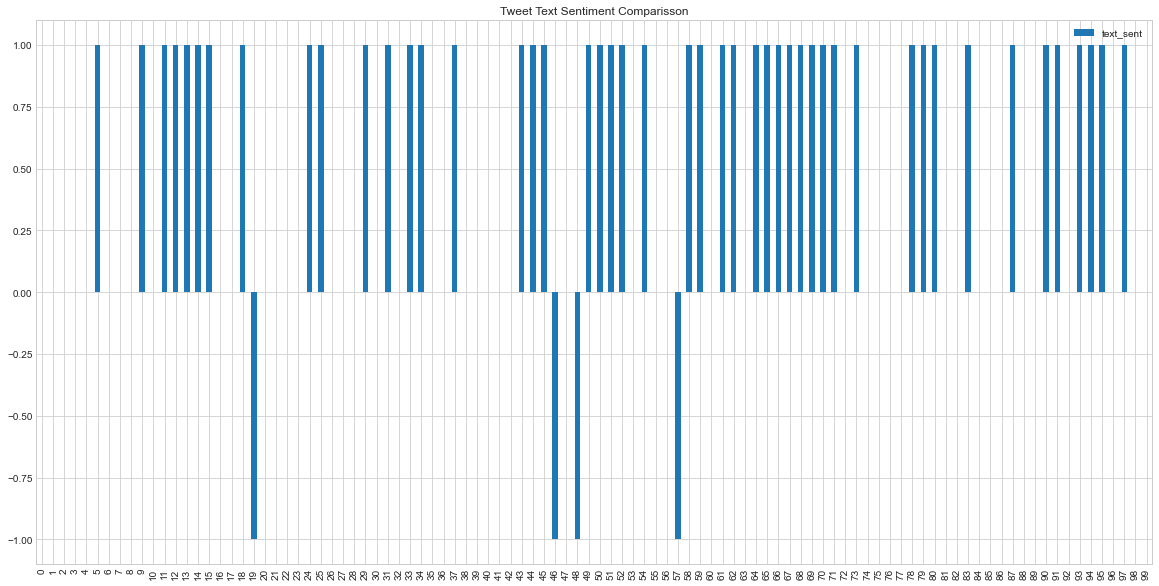

In [25]:
 # Plot bar chart
ethereum_df_text.plot(
    y=["text_sent"],
    kind="bar",
    title="Tweet Text Sentiment Comparisson",
    figsize=(20, 10),
    grid=True,
)

In [26]:
ethereum_df_text.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,0.233223,0.128170,0.85644,0.015400,0.430000
std,0.333936,0.150951,0.15937,0.065794,0.573048
min,-0.874400,0.000000,0.45000,0.000000,-1.000000
25%,0.000000,0.000000,0.73200,0.000000,0.000000
50%,0.000000,0.000000,0.87100,0.000000,0.000000
75%,0.498075,0.243750,1.00000,0.000000,1.000000
max,0.883400,0.485000,1.00000,0.550000,1.000000


In [19]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
ethereum_df_text['text']= ethereum_df_text['text'].apply(lambda x: stemming_on_text(x))
ethereum_df_text['text'].head()

0    RT AteriumUniverse If youre seeing youre early...
1    Check item OpenSea httpstco3tAO1rOgj lewat ope...
2    I believe ea btc100000 btc bitcoin binance eth...
3    North Korean Lazarus Group allegedly behind Ro...
4    Heres Chiliz CHZ multiteam NFL partnership Web...
Name: text, dtype: object

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# Generate the Bitcoin word cloud
# YOUR CODE HERE
token_text_df_ethereum = ethereum_df_text['token_text']
token_text_df_ethereum

0     [RT, AteriumUniverse, If, youre, seeing, youre...
1     [Check, item, OpenSea, httpstco3tAO1rOgj, lewa...
2     [I, believe, ea, btc100000, btc, bitcoin, bina...
3     [North, Korean, Lazarus, Group, allegedly, beh...
4     [Heres, Chiliz, CHZ, multiteam, NFL, partnersh...
                            ...                        
95    [RT, hoskytoken, Giveaway1000000000, milkHOSKY...
96    [RT, bullbnb, Thats, I, think, I, wana, know, ...
97    [Yesterday, I10, btc, Today100000, YEAH, bitco...
98    [RT, AnimeLtd, MetaMask, software, cryptocurre...
99    [RT, whalealert, 20000000, USDT, 20000000, USD...
Name: token_text, Length: 100, dtype: object

In [21]:
ethereum_df_text_cloud = ' '.join(str(e) for e in token_text_df_ethereum)
ethereum_df_text_cloud

"['RT', 'AteriumUniverse', 'If', 'youre', 'seeing', 'youre', 'early', 'Any', 'interaction', 'tweet', 'considered', 'WL', 'Ethereum', 'Ethereu'] ['Check', 'item', 'OpenSea', 'httpstco3tAO1rOgj', 'lewat', 'opensea', 'NFTs', 'NFT', 'NFTCommmunity', 'Metamask', 'NFTGiveaways', 'NFTCommunity', 'NFTProject', 'NFTCollection', 'ETH', 'Ethereum', 'OpenSeaNFT', 'opensea', 'Polygon', 'Metaverse', 'NFTartist'] ['I', 'believe', 'ea', 'btc100000', 'btc', 'bitcoin', 'binance', 'eth', 'ethereum', 'httpstcorel2oM3xhe'] ['North', 'Korean', 'Lazarus', 'Group', 'allegedly', 'behind', 'Ronin', 'Bridge', 'hack', 'ethereum', 'crypto', 'httpstco38sh62ZNm6'] ['Heres', 'Chiliz', 'CHZ', 'multiteam', 'NFL', 'partnership', 'Web3', 'expansion', 'plan', 'could', 'bullish', 'ethereum', 'crypto', 'httpstcoM1LC1uQV'] ['Exchanges', 'buy', 'Ethereum', 'The', 'easiest', 'perhaps', 'popular', 'way', 'buying', 'Ether', 'exchange', 'httpstcotRRcDmR94o', 'http', 'Defi', 'httpstcov8sJO65VIQ', 'blockchain', 'httpstco7D5ewdN3eQ'

In [ ]:
 # Plot bar chart
ethereum_df_text.plot(
    y=["text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)